# Классификация оттока сотрудников

Импортируем библиотеки для работы с данными

In [3]:
import numpy as np
import pandas as pd

Загрузим набор данных для классификации оттока сотрудников.

In [5]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df = pd.concat([df_train, df_test], ignore_index=True)

In [6]:
# выведем первые 5 строк
df.head().T

,0,1,2,3,4
Employee ID,8410,64756,30257,65791,65026
Age,31,59,24,36,56
Gender,Male,Female,Female,Female,Male
Years at Company,19,4,10,7,41
Job Role,Education,Media,Healthcare,Education,Education
Monthly Income,5390,5534,8159,3989,4821
Work-Life Balance,Excellent,Poor,Good,Good,Fair
Job Satisfaction,Medium,High,High,High,Very High
Performance Rating,Average,Low,Low,High,Average
Number of Promotions,2,3,0,1,0


In [7]:
df.shape

(74498, 24)

Всего 74498 записей и 24 признакоа

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents  

* Employee ID – уникальный идентификатор сотрудника.
* Age – возраст сотрудника.
* Gender – пол сотрудника.
* Years at Company – количество лет работы в компании.
* Job Role – должность или отдел сотрудника.
* Monthly Income – ежемесячная зарплата сотрудника.
* Work-Life Balance – восприятие сотрудником баланса между работой и личной жизнью.
* Job Satisfaction – удовлетворённость работой.
* Performance Rating – оценка эффективности работы сотрудника.
* Number of Promotions – общее количество повышений.
* Overtime – наличие сверхурочной работы.
* Distance from Home – расстояние от дома до работы.
* Education Level – наивысший уровень образования сотрудника.
* Marital Status – семейное положение.
* Number of Dependents – количество иждивенцев.
* Job Level – уровень должности.
* Company Size – размер компании.
* Company Tenure – общее количество лет работы в отрасли.
* Remote Work – работа на удалёнке.
* Leadership Opportunities – наличие возможностей для лидерства.
* Innovation Opportunities – наличие возможностей для инноваций.
* Company Reputation – восприятие репутации компании.
* Employee Recognition – уровень признания заслуг сотрудника.
* Attrition – факт ухода сотрудника из компании.

8 колонок числовые показатели <br>
16 колонок категориальные данные

## Предобработка данных:

Проверим наличие пропусков

In [14]:
df.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

Пропусков не имеется

Так же проверим наличие дублкатов

In [17]:
df.duplicated().sum()

0

Дубликатов не имеется

Просмотрим статистическую информацию, возможно увидим ошибки или выбросы

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Employee ID,74498.0,37249.500000,21505.864514,1.0,18625.25,37249.5,55873.75,74498.0
Age,74498.0,38.529746,12.083456,18.0,28.00,39.0,49.00,59.0
Years at Company,74498.0,15.721603,11.223744,1.0,7.00,13.0,23.00,51.0
Monthly Income,74498.0,7299.379514,2152.508566,1226.0,5652.00,7348.0,8876.00,16149.0
Number of Promotions,74498.0,0.832935,0.995289,0.0,0.00,1.0,2.00,4.0
Distance from Home,74498.0,49.991584,28.513611,1.0,25.00,50.0,75.00,99.0
Number of Dependents,74498.0,1.650326,1.553633,0.0,0.00,1.0,3.00,6.0
Company Tenure,74498.0,55.727456,25.399349,2.0,36.00,56.0,76.00,128.0


Все данные корректны

## Проверка нормальности распределения

Импортируем библиотеки для построенния графиков

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

Построим hist для визуального определения нормальности распределения всех признаков

In [26]:
from sklearn.preprocessing import LabelEncoder

df_num = df.copy()

for col in df_num.select_dtypes(include='object').columns:
    print(col)
    df_num[col] = LabelEncoder().fit_transform(df_num[col])

Gender
Job Role
Work-Life Balance
Job Satisfaction
Performance Rating
Overtime
Education Level
Marital Status
Job Level
Company Size
Remote Work
Leadership Opportunities
Innovation Opportunities
Company Reputation
Employee Recognition
Attrition


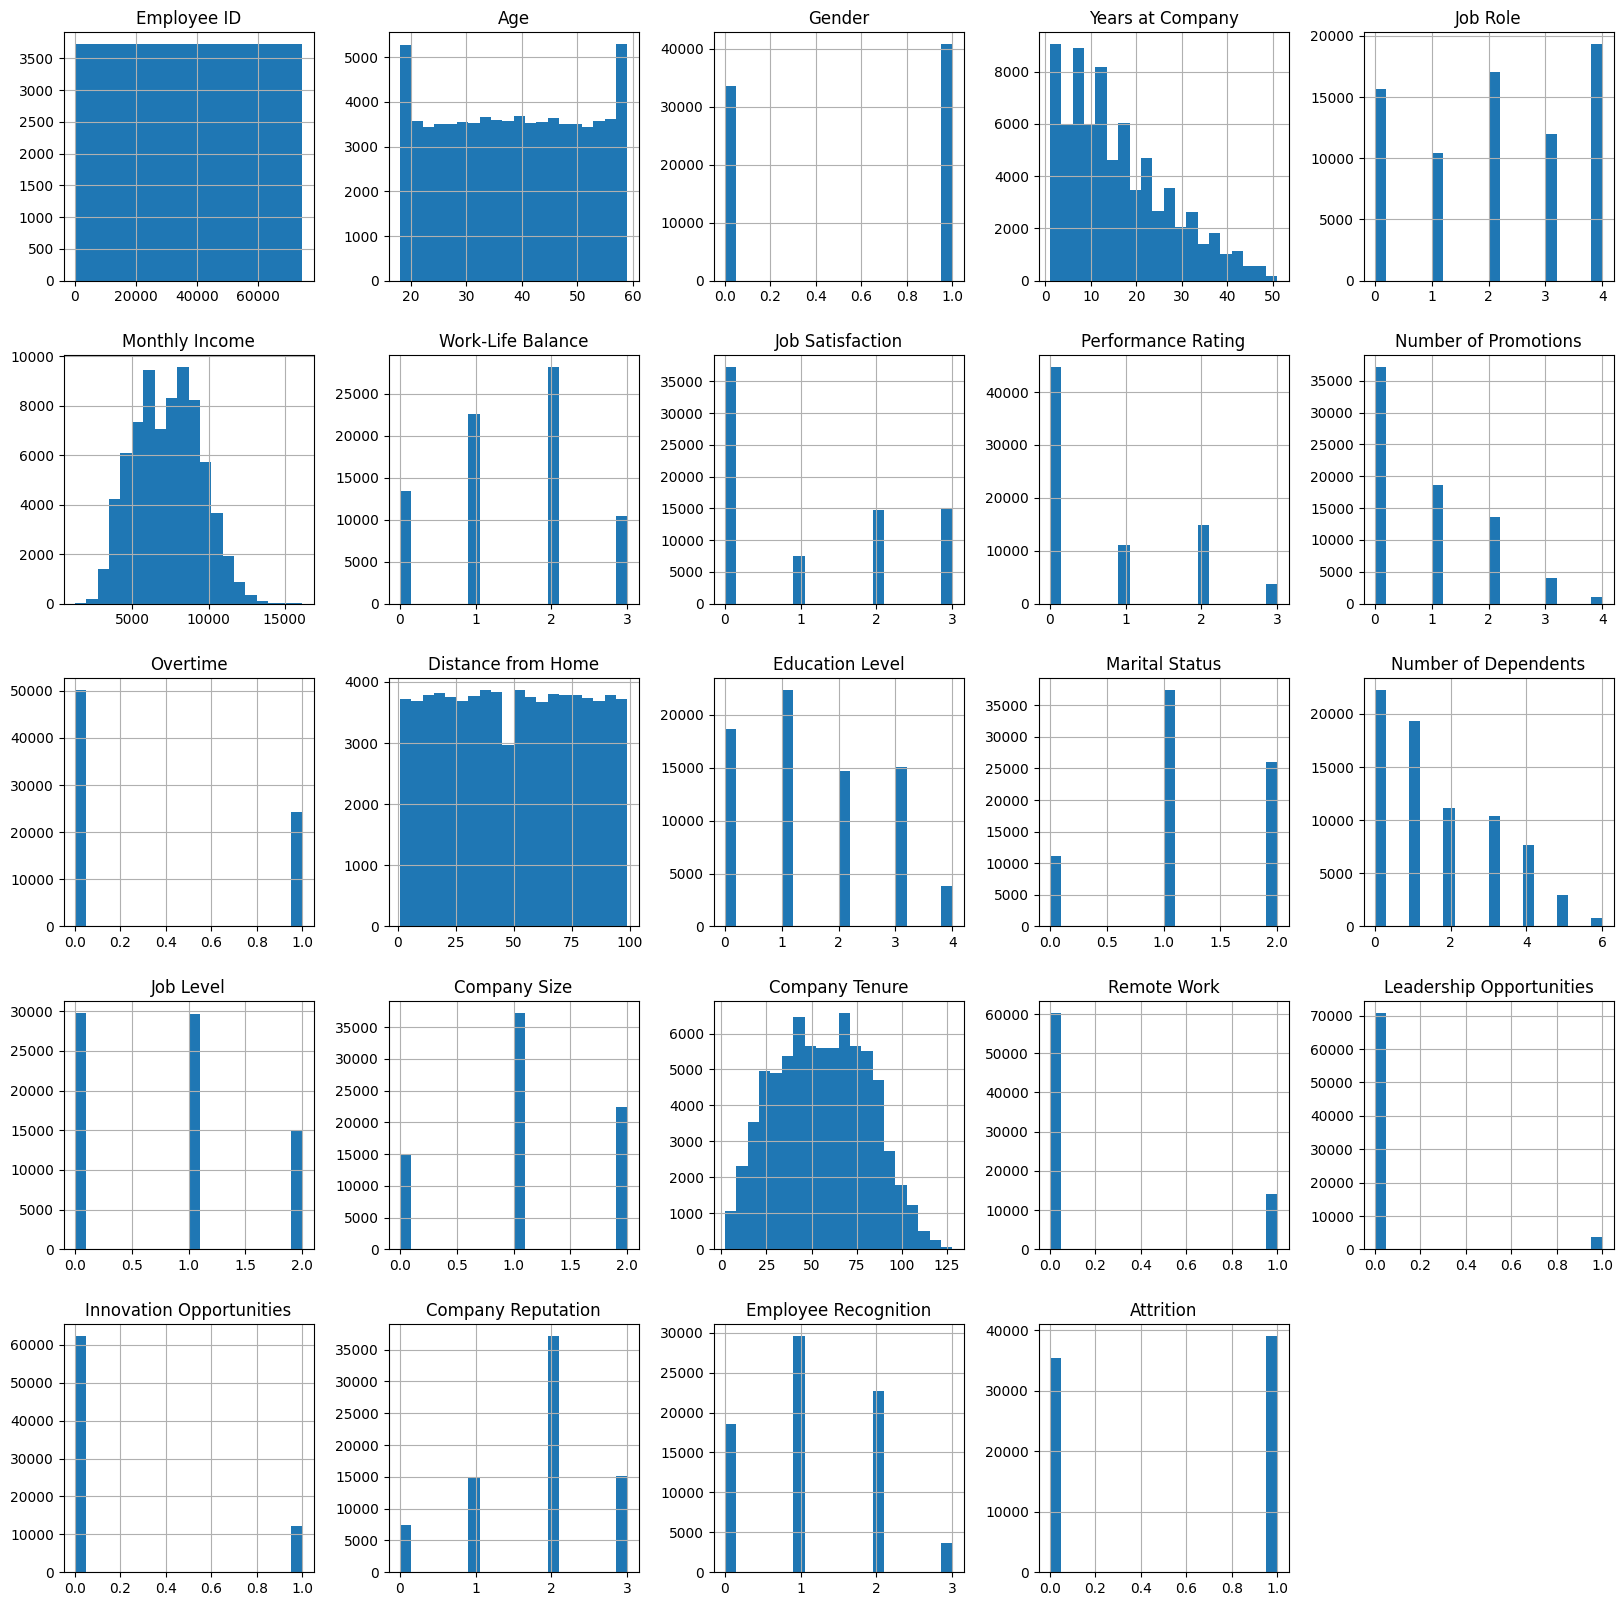

In [27]:
df_num.hist(figsize=(20, 20), bins=20);

Судя по данному графику видно, что распределение не похоже на нормальное.

## Поиск зависимостей 

Выведем pairplot для всех признаков, что поможет визуально определить зависимостей между ними.

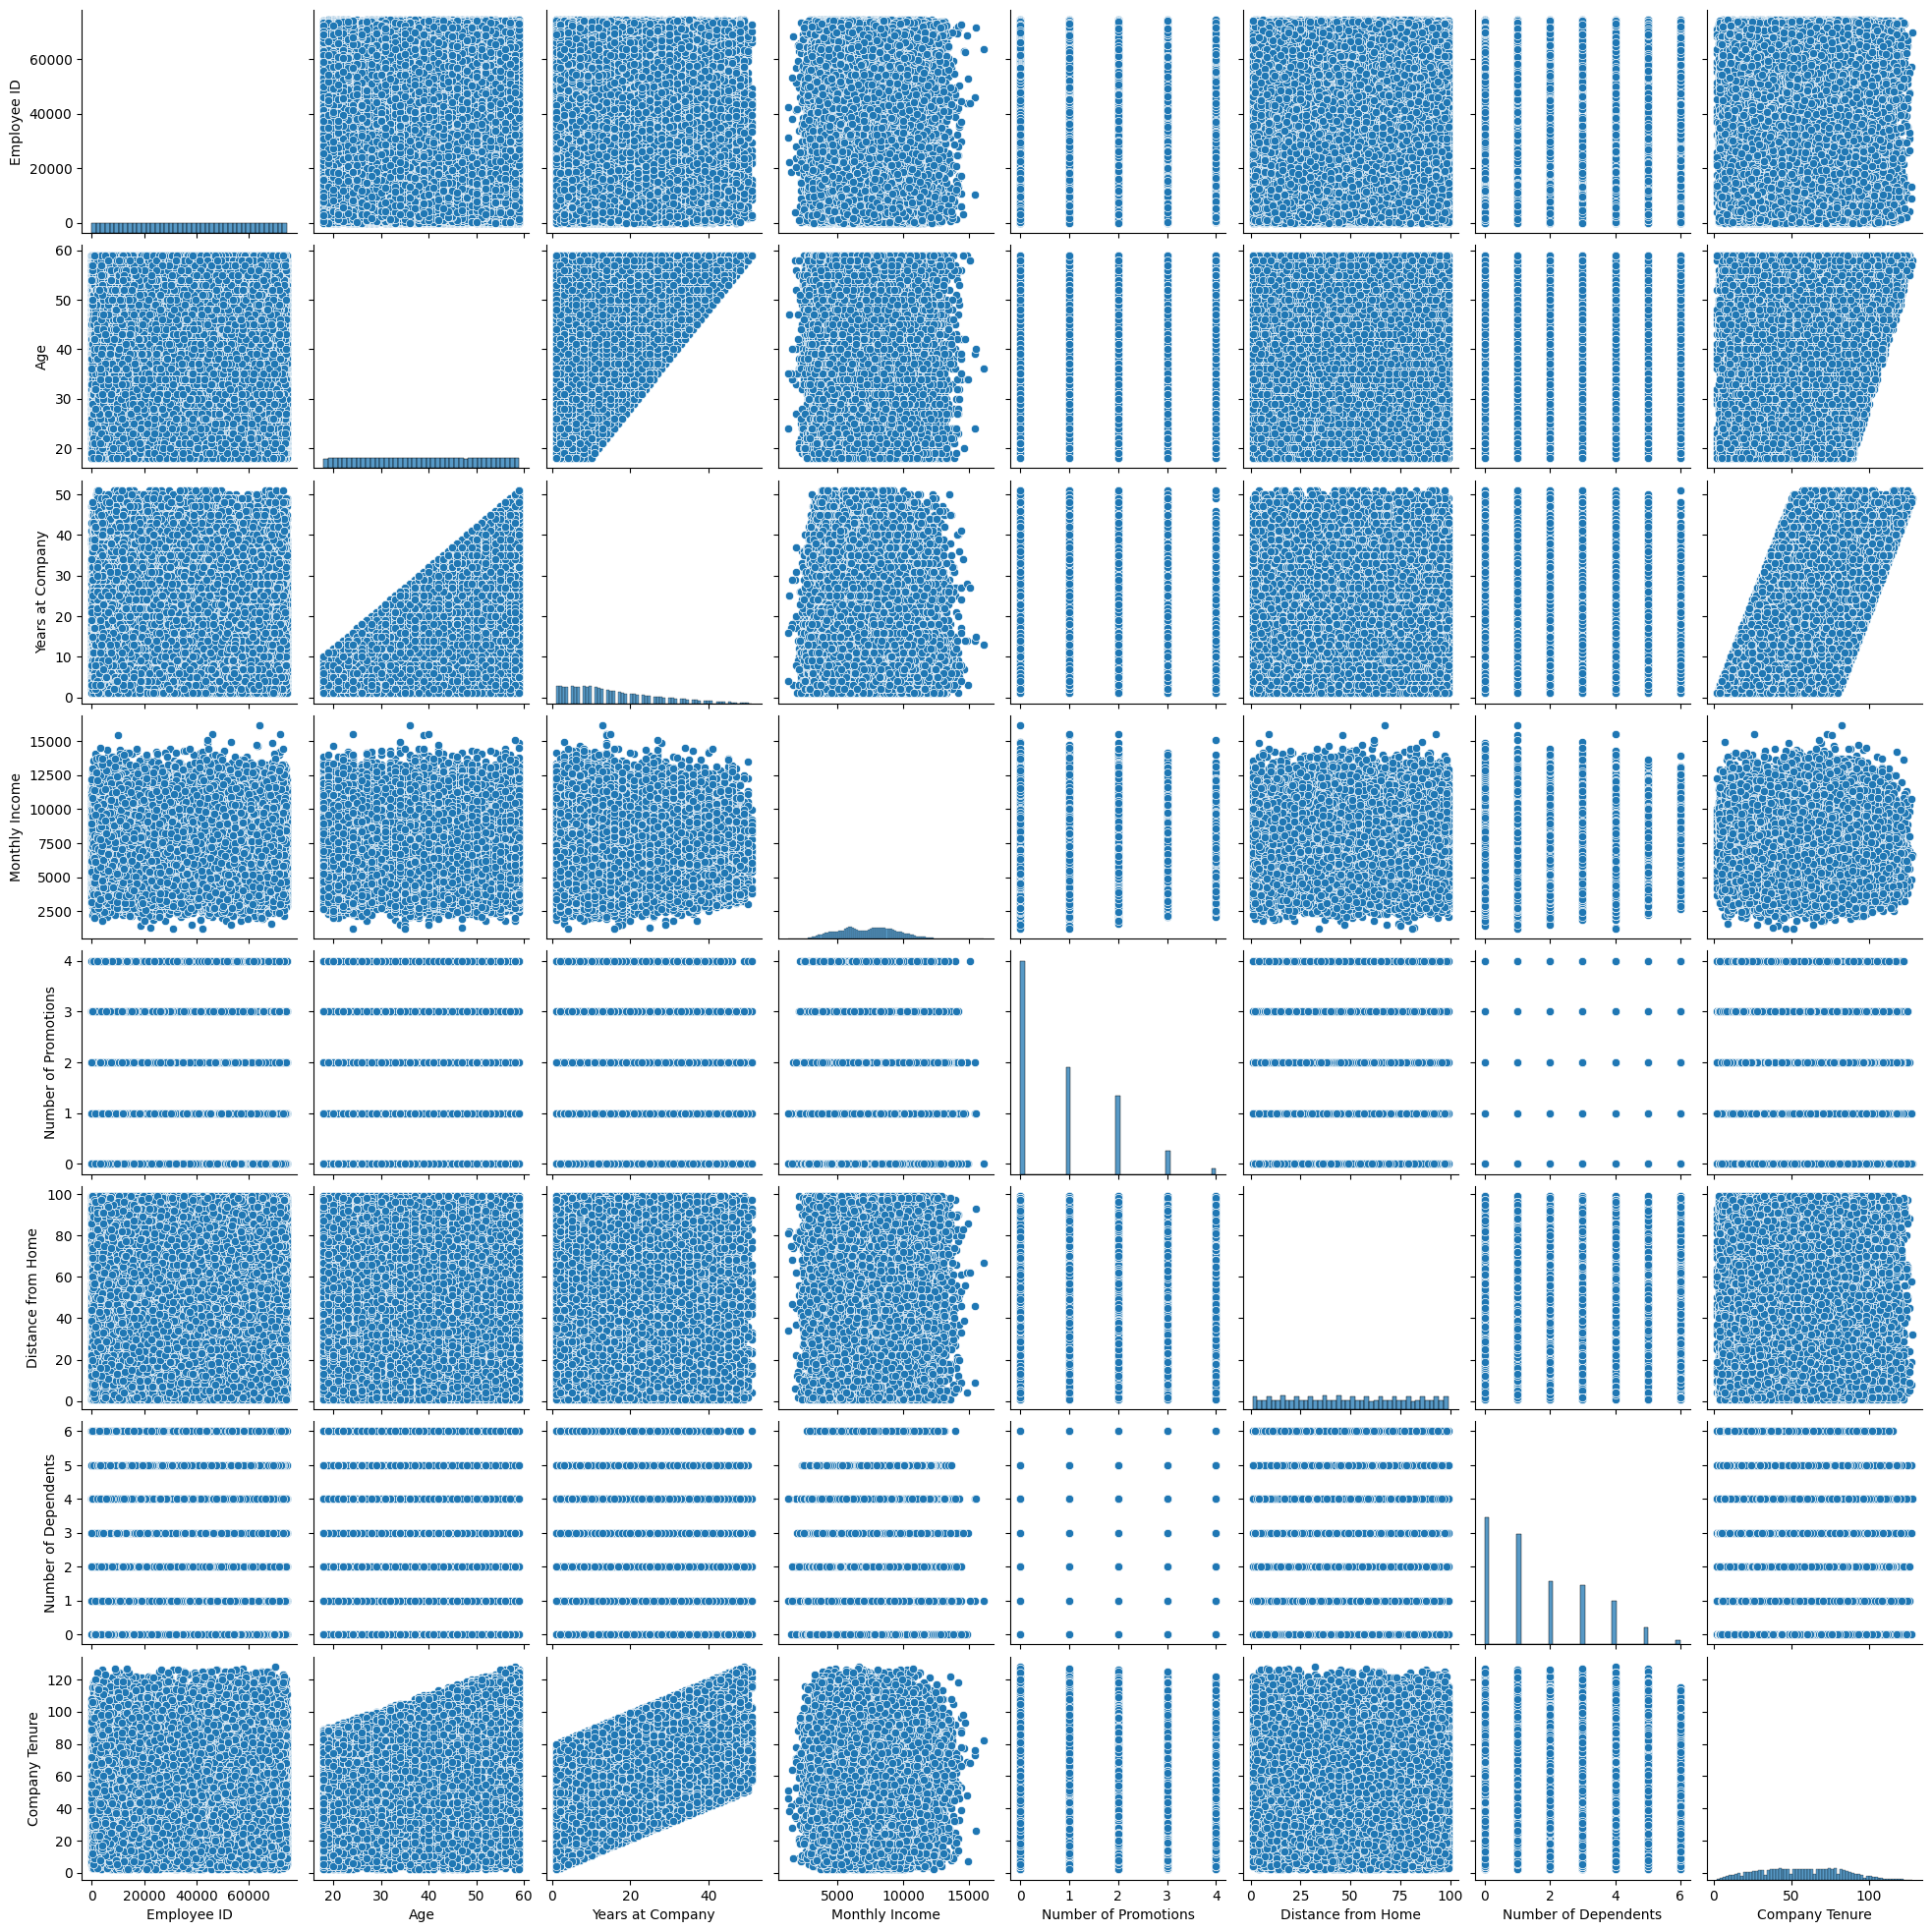

In [31]:
sns.pairplot(df);

Судя по данному графику сложно определить зависимости, значения сильно разбросанны.
Можно сказать, что имеется небольшая зависитость между признаками Age и Years as Company

Что бы убедиться в этом подсчитаем корреляцию, а так же выведем тепловую карту для наглядной визуализации корреляции.

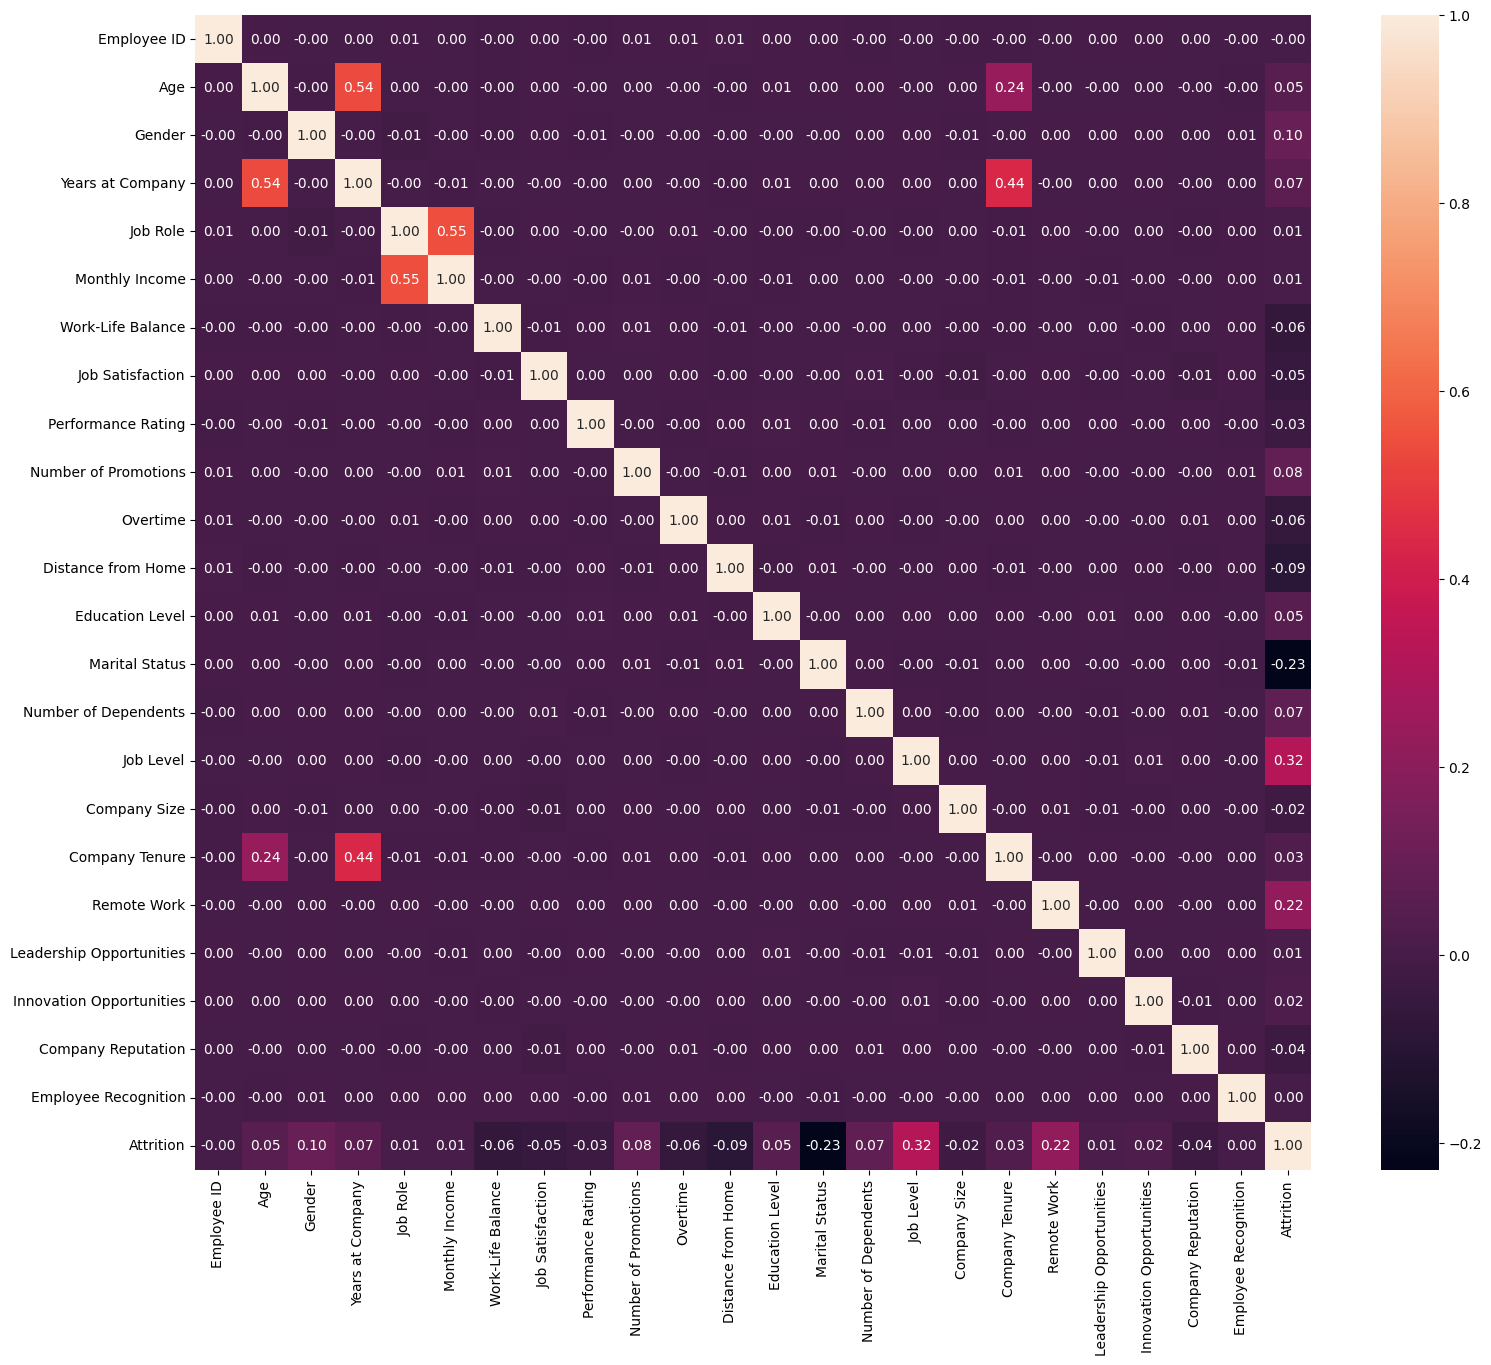

In [34]:
plt.figure(figsize=(18, 15))
sns.heatmap(df_num.corr(), annot=True, fmt="0.2f");

Можно заменить сильную  корреляцию между Job Role и Monthly Income. Корреляция между Attriction и признаками Job Level, Company Tenure, Years at Company, Marital Status, а так же Education Level, говорит о следующем: 
* чем дольше сотрудник работает в компании, тем ниже вероятность ухода
* высокий уровень должности и длительный стаж снижают текучесть
* женатые сотрудники реже покидают компанию
* сотрудники с высоким образованием реже покидают компанию

Положительная корреляция в Remote Work указывает на то, что удаленная работа повышает текучесть 

## Обучение моделей

Разделим выборку на обучающую и тестовую

In [38]:
X = df.drop(["Attrition"], axis=1)
y = df["Attrition"]

Закодируем признаки для обучения моделей

In [40]:
X_encoded = pd.get_dummies(X, drop_first=False)

In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

Разделим выборку на обучаюую и тестовую

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

Приведём bool значения к int

In [45]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [46]:
X_train.shape[0]

52148

In [47]:
X_test.shape[0]

22350

Рассчитаем веса классов

In [49]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, class_weights))
class_weights

{0: 1.0552857374129836, 1: 0.9502186588921283}

In [50]:
import warnings
warnings.filterwarnings('ignore')

Импортируем модели и приступим к обучению

In [52]:
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import F1Score

In [53]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
logistic_regression_predict = logistic_regression.predict(X_test)
print(classification_report(y_test, logistic_regression_predict))

              precision    recall  f1-score   support

           0       0.57      0.52      0.55     10662
           1       0.60      0.65      0.62     11688

    accuracy                           0.59     22350
   macro avg       0.59      0.58      0.58     22350
weighted avg       0.59      0.59      0.59     22350



In [54]:
xgb_classifier = XGBClassifier(max_depth=10, learning_rate=1, use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)
xgb_classifier_predict = xgb_classifier.predict(X_test)
print(classification_report(y_test, xgb_classifier_predict))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71     10662
           1       0.73      0.74      0.74     11688

    accuracy                           0.72     22350
   macro avg       0.72      0.72      0.72     22350
weighted avg       0.72      0.72      0.72     22350



In [55]:
model = Sequential()

model.add(Dense(64, input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Dropout(0.25))
          
model.add(Dense(1, activation='sigmoid'))

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64, class_weight=class_weights, callbacks=[early_stop])

Epoch 1/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5005 - loss: 0.7347 - val_accuracy: 0.5220 - val_loss: 0.6927
Epoch 2/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5006 - loss: 0.7040 - val_accuracy: 0.4870 - val_loss: 0.6935
Epoch 3/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5031 - loss: 0.6965 - val_accuracy: 0.5246 - val_loss: 0.6920
Epoch 4/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5181 - loss: 0.6934 - val_accuracy: 0.4970 - val_loss: 0.6950
Epoch 5/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5516 - loss: 0.6860 - val_accuracy: 0.5715 - val_loss: 0.6807
Epoch 6/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5716 - loss: 0.6765 - val_accuracy: 0.6382 - val_loss: 0.6618
Epoch 7/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6069 - loss: 0.6577 - val_accuracy: 0.6058 - val_loss: 0.6530
Epoch 8/100
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6552 - loss: 0.6101 - val_accu

In [56]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))

699/699 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
              precision    recall  f1-score   support

           0       0.78      0.61      0.68     10662
           1       0.70      0.84      0.77     11688

    accuracy                           0.73     22350
   macro avg       0.74      0.72      0.72     22350
weighted avg       0.74      0.73      0.73     22350



Text(0, 0.5, 'Loss')

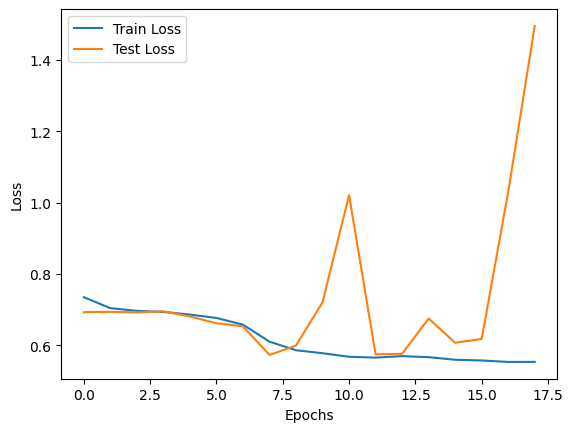

In [57]:
plt.plot(model.history.history['loss'],label='Train Loss')
plt.plot(model.history.history['val_loss'],label='Test Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

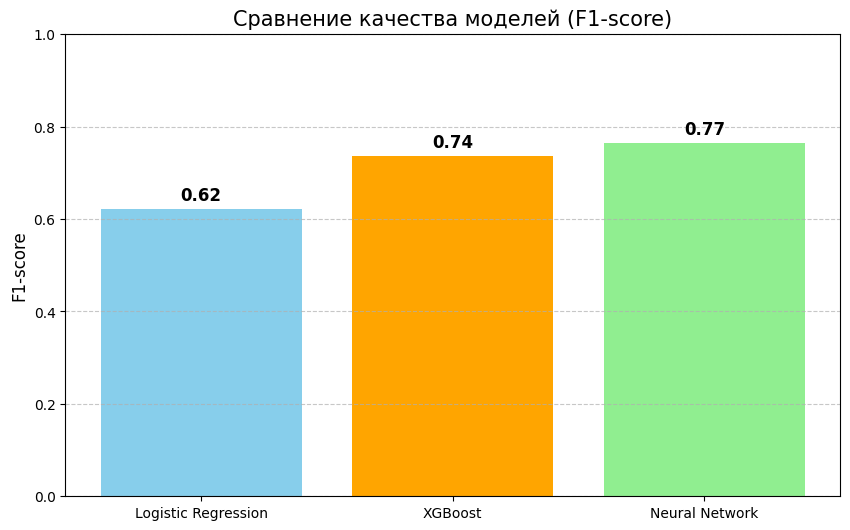

In [58]:
from sklearn import metrics
import matplotlib.pyplot as plt

logistic_regression_f1 = metrics.f1_score(y_test, logistic_regression_predict)
xgb_classifier_f1 = metrics.f1_score(y_test, xgb_classifier_predict)
neural_network_f1 = metrics.f1_score(y_test, y_pred)

models = ['Logistic Regression', 'XGBoost', 'Neural Network']
scores = [logistic_regression_f1, xgb_classifier_f1, neural_network_f1]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, scores, color=['skyblue', 'orange', 'lightgreen'])

plt.title('Сравнение качества моделей (F1-score)', fontsize=15)
plt.ylabel('F1-score', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f'{height:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

## Выводы

__Был произведён расчёт и анализ основных статистических параметров:__
* возраст сотрудников от 18 до 59 лет
* средняя зарплата ~7300, максимальная 16149

__Выявлены зависимости и закономерности:__
* имеется сильная корреляцию между Job Role и Monthly Income.

Корреляция между Attriction и признаками Job Level, Company Tenure, Years at Company, Marital Status, а так же Education Level, говорит о следующем:
* чем дольше сотрудник работает в компании, тем ниже вероятность ухода
* высокий уровень должности и длительный стаж снижают текучесть
* женатые сотрудники реже покидают компанию
* сотрудники с высоким образованием реже покидают компанию
* положительная корреляция в Remote Work указывает на то, что удаленная работа повышает текучесть

__Обучены модели:__

LogisticRegression f1-score: 0.59 <br>
XGBClassifier f1-score: 0.74 <br>
Нейронная сеть f1-score: 0.75

Нейронная модель лучше улавливает нелинейные зависимости между признаками. Превосходит линейную модель и незначительно опережает градиентный бустинг